# Datacheck and visualization
## Init & version check

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print('numpy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(sns.__version__))
print('scikit-learn: {}'.format(sklearn.__version__))

numpy: 1.19.5
pandas: 1.1.5
matplotlib: 3.3.4
seaborn: 0.11.1
scikit-learn: 0.24.1


## Titanic Data DL

In [3]:
import pandas as pd
import numpy as np
 
# train data
train = pd.read_csv('https://raw.githubusercontent.com/kotaronov27/KaggleSB/main/Note/Titanic/data/train.csv')
# org create
train_org = train.copy()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# test data
test = pd.read_csv('https://raw.githubusercontent.com/kotaronov27/KaggleSB/main/Note/Titanic/data/test.csv')
# org create
test_org = test.copy()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# gender data
gendersb = pd.read_csv('https://raw.githubusercontent.com/kotaronov27/KaggleSB/main/Note/Titanic/data/gender_submission.csv')
# org create
gendersb_org = gendersb.copy()
gendersb.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Sex', ylabel='count'>

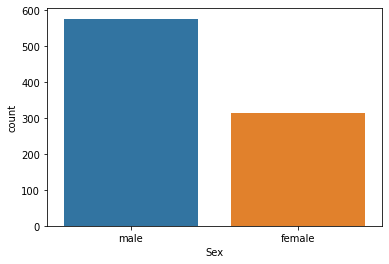

In [7]:
sns.countplot('Sex', data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

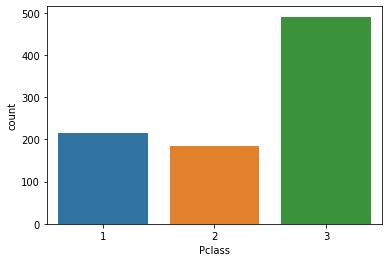

In [8]:
sns.countplot('Pclass', data=train)

<AxesSubplot:xlabel='Age', ylabel='count'>

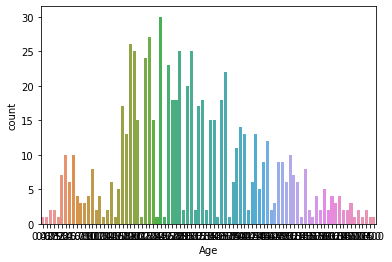

In [9]:
sns.countplot('Age', data=train)

<AxesSubplot:xlabel='Age'>

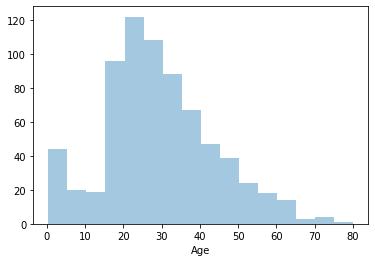

In [10]:
sns.distplot(train['Age'].dropna(), kde=False, bins=16)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

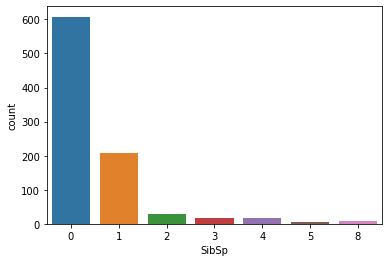

In [11]:
# 家族（兄弟配偶者でcountplot）
sns.countplot('SibSp', data=train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

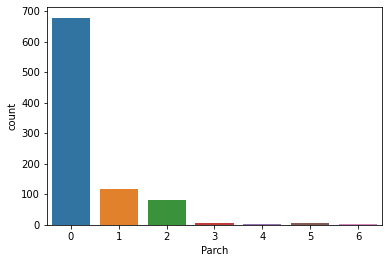

In [12]:
# 家族（親子供でcountplot）
sns.countplot('Parch', data=train)

<AxesSubplot:xlabel='Ticket', ylabel='count'>

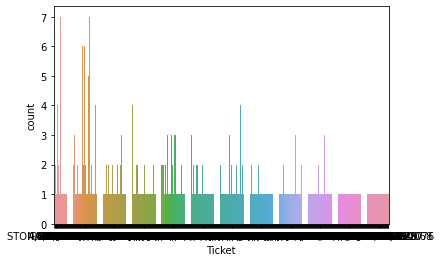

In [13]:
# チケット
sns.countplot('Ticket', data=train)

In [14]:
# チケット行確認
train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [15]:
# 番号部分抽出
def extract_ticket_number(x):
  ticket = x['Ticket']
  return ticket.split(" ")[-1]

# チケット番号を取り出した列を追加
train['TicketNumber'] = train.apply(extract_ticket_number, axis=1)

# 番号でソートして、先頭10行を取り出す
train.sort_values(by='TicketNumber')[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketNumber
283,284,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.05,NaN,S,10482
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.50,B77,S,110152
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.50,B79,S,110152
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.50,B77,S,110152
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S,110413
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.65,E68,S,110413
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S,110413
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.00,A14,S,110465
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.00,C110,S,110465
430,431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.55,C52,S,110564


<AxesSubplot:xlabel='Fare', ylabel='count'>

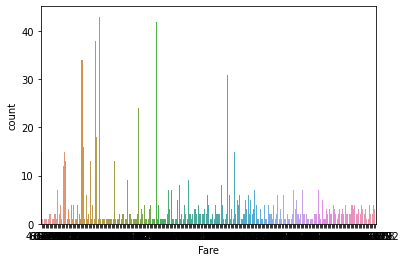

In [16]:
#Fare
sns.countplot('Fare', data=train)

<AxesSubplot:xlabel='Fare'>

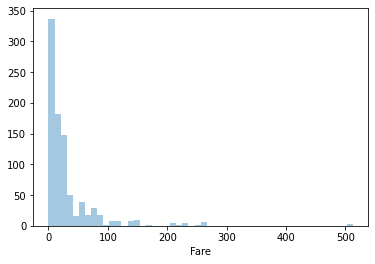

In [17]:
#Fare ヒストグラム
sns.distplot(train['Fare'], kde=False)

In [18]:
#Fare 料金ソート
train.sort_values(by='Fare')[0:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketNumber
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S,LINE
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S,LINE
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,LINE
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S,112052
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S,239853
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S,239853
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S,239856
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S,112059
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S,239853
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S,239855


<AxesSubplot:xlabel='Cabin', ylabel='count'>

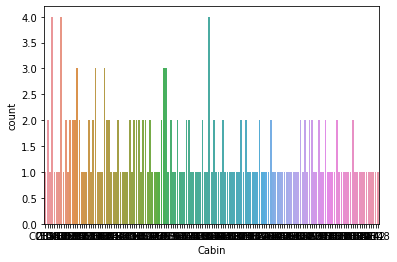

In [19]:
#Cabin
sns.countplot("Cabin", data=train)

In [20]:
#Cabin sort
train.sort_values(by='Cabin')[0:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketNumber
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C,13049
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,110465
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,11755
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S,113056
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,17485
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,27042
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,17590
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C,13213
209,210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.0000,A31,C,112277
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S,113767


In [21]:
#Cabin sort (reverse)
train.sort_values(by='Cabin', ascending=False)[0:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketNumber
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5000,T,S,113784
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,9549
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,347054
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,347054
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,9549
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S,230136
618,619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S,230136
776,777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q,383121
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S,29395
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S,248733


<AxesSubplot:xlabel='CabinType', ylabel='count'>

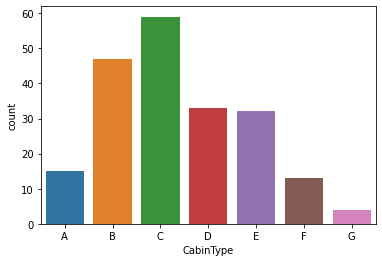

In [22]:
# 番号部分を取り出す(T は誤りとして処理)
def extract_cabin_type(x):
  cabin = x['Cabin']
  if isinstance(cabin, str) and cabin[0] != 'T':
    return cabin[0]
  else:
    return np.nan

# 訓練データとテストデータの両方に、チケット番号を取り出したCabinType列を追加
train['CabinType'] = train.apply(extract_cabin_type, axis=1)
test['CabinType'] = test.apply(extract_cabin_type, axis=1)

sortedCabinTypes = sorted(set(train['CabinType'].dropna()))

sns.countplot("CabinType", data=train, order=sortedCabinTypes)

<AxesSubplot:xlabel='PersonType', ylabel='count'>

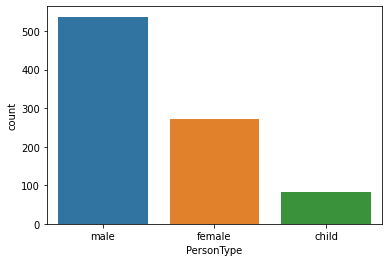

In [23]:
# 子供、男性、女性に分類
def male_female_child(x):
  age = x['Age']
  sex = x['Sex']
  # 15歳以下なら子供、それ以外を male / female に分ける
  if age <= 15:
    return 'child'
  else:
    return sex

# 訓練データとテストデータの両方に、male / female / childに分けたPersonType列を追加
train['PersonType'] = train.apply(male_female_child,axis=1)
test['PersonType'] = test.apply(male_female_child,axis=1)

sns.countplot('PersonType', data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

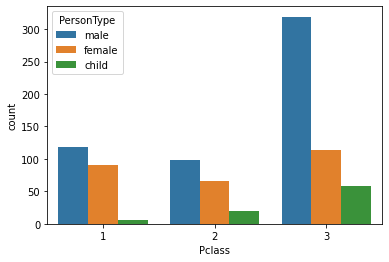

In [24]:
# チケットクラスごとに分類
sns.countplot('Pclass', data=train, hue='PersonType')

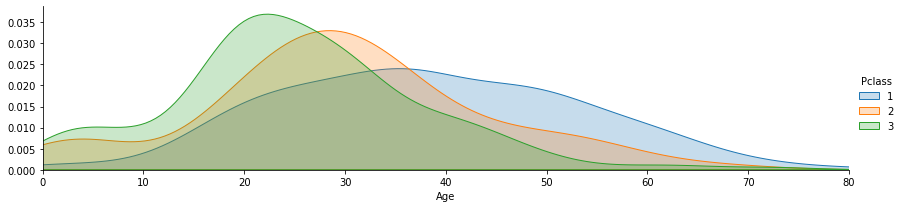

In [25]:
# カーネル密度分布
# チケットクラスで層別化して、グラフを少し横長に設定
fig = sns.FacetGrid(train, hue="Pclass",aspect=4)

# チケットクラスごとにkdeplotを描く
fig.map(sns.kdeplot, 'Age', shade=True)

# 横軸の表示範囲を設定
oldest = train['Age'].max()
fig.set(xlim=(0,oldest))

# 凡例を表示
fig.add_legend()

<AxesSubplot:xlabel='Embarked', ylabel='count'>

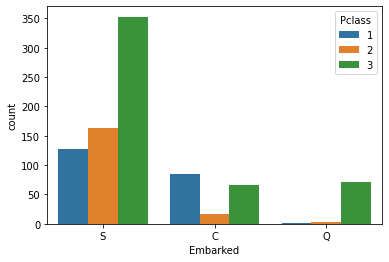

In [26]:
# 乗船可視化
#Southampton(S)
#Cherbourg(C)
#Queenstown(Q)
sns.countplot('Embarked', data=train, hue='Pclass')

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

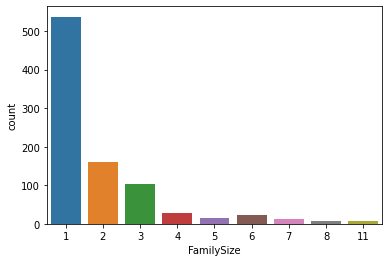

In [27]:
# 訓練データとテストデータのそれぞれについて、FamilySize列を追加する
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

sns.countplot('FamilySize', data=train)

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

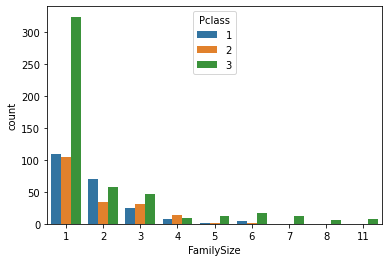

In [28]:
sns.countplot('FamilySize', data=train, hue='Pclass')

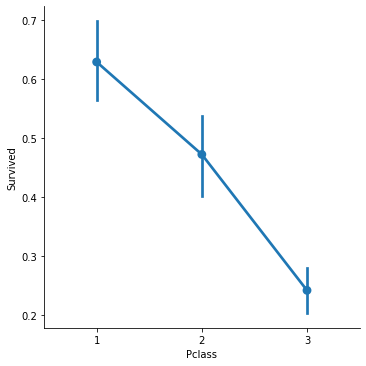

In [29]:
# 解析メイン（死亡率）
# チケットクラス
sns.catplot('Pclass', 'Survived', data=train, order=[1,2,3], kind='point')

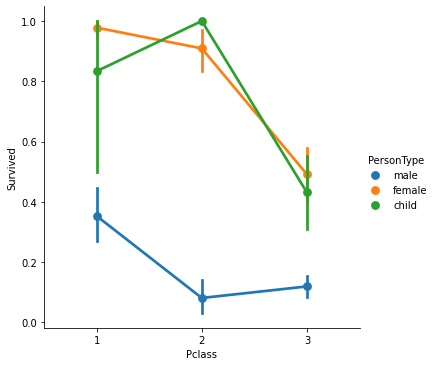

In [30]:
# 年齢、男女で分ける
sns.catplot('Pclass', 'Survived', hue='PersonType', data=train, order=[1,2,3], kind='point')

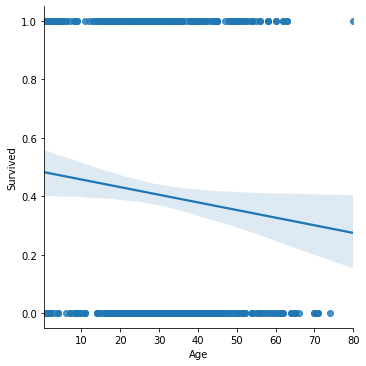

In [31]:
# 年齢での生死
sns.lmplot('Age', 'Survived', data=train)

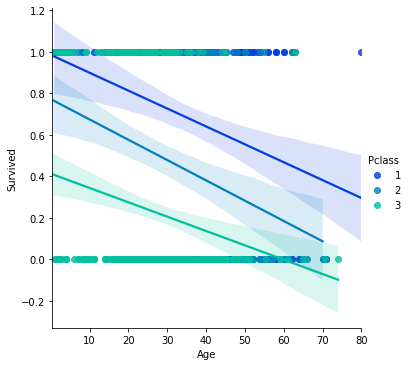

In [32]:
# チケットクラスごと
sns.lmplot('Age', 'Survived', hue='Pclass', data=train, palette='winter', hue_order=[1,2,3])

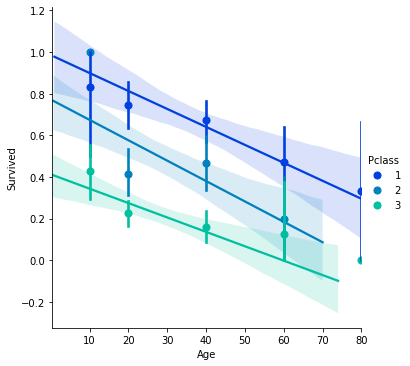

In [33]:
# x_binsで指定した年齢について、生存確率の推定値を表示
sns.lmplot('Age','Survived',hue='Pclass',data=train, palette='winter', x_bins=[10,20,40,60,80], hue_order=[1,2,3])

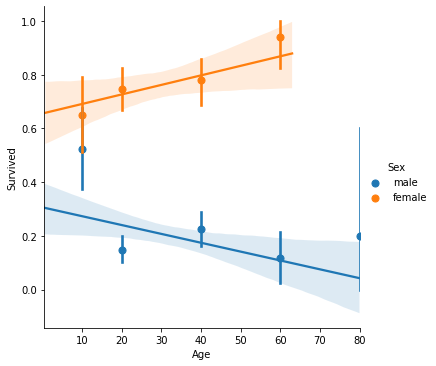

In [34]:
# 性別、年齢ごと
sns.lmplot('Age', 'Survived', hue='Sex', data=train, x_bins=[10,20,40,60,80])

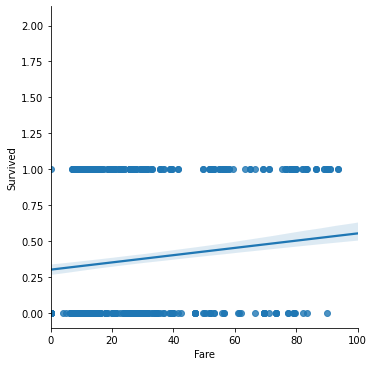

In [35]:
# 料金と生死
fig = sns.lmplot('Fare', 'Survived', data=train)

# X軸の範囲を0から100に限定
fig.set(xlim=(0,100))

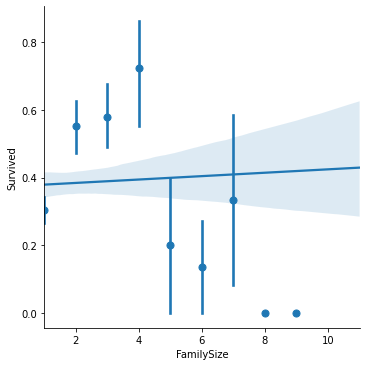

In [36]:
# 家族と生死
sns.lmplot('FamilySize', 'Survived', data=train, x_bins=[1, 2, 3, 4, 5, 6, 7, 8, 9])

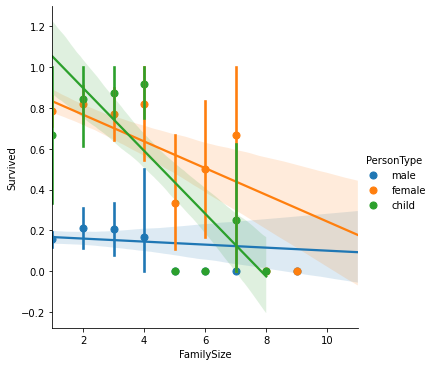

In [37]:
# 家族と子供、男性、女性でプロット
sns.lmplot('FamilySize', 'Survived', hue='PersonType', data=train, x_bins=[1, 2, 3, 4, 5, 6, 7, 8, 9])